<h1><center>Fifa challenge</center></h1>

</center></h2> Team: Julia, Jusef, Akshay </center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import re
from matplotlib import pyplot as plt

- Goalkeeper: Orange
- GK: Goalkeeper
- Defense: Yellow
- CB: Center-back
- LCB: Left center-back
- RCB: Right center-back
- LB: Left-back (Full-back)
- RB: Right-back (Full-back)
- Midfield: Green
- CM : Centre midfield
- LDM: Left defensive midfield
- LAM: Left attacking midfield
- RDM: Right defensive midfield
- RAM: Right attacking midfield
- CDM: Centre defensive midfield
- CAM: Centre attacking midfield
- LM : Left midfield
- RM : Right midfield
- Attack: Blue
- ST: Striker
- CF: Center forward
- LW: Left winger
- RW: Right winger

In [2]:
data = pd.read_csv('fifa21_train.csv')

display(data.head())
display(data.tail())
data.shape

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68
11700,236507,T. Conechny,22,Argentina,Portland Timbers,CAM,ST CAM LM,Portland Timbers 2019 ~ 2020,"5'7""",143lbs,...,43+2,43+2,46+2,44+2,36+2,36+2,36+2,44+2,15+2,64


(11701, 101)

<h1>Data cleaning</h1>

In [3]:
# Standardize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
# Numerical and categorical columns

num_col = data.select_dtypes(include=['float64']).columns
display(num_col)

cat_col = data.select_dtypes(include=['object']).columns
display(cat_col)

Index(['volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions',
       'positioning', 'vision', 'composure', 'sliding tackle'],
      dtype='object')

Index(['name', 'nationality', 'club', 'bp', 'position', 'team & contract',
       'height', 'weight', 'foot', 'joined', 'loan date end', 'value', 'wage',
       'release clause', 'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object')

In [5]:
data = data.drop_duplicates() #we have no duplicates
data.shape

(11701, 101)

In [6]:
#data.isna().sum() 
#nan_sum = data.isnull().sum().sum() #check for NaN sum total is 9254
#display(nan_sum)
data.columns[data.isna().any()].tolist() #all the columns with NaN

['club',
 'position',
 'joined',
 'loan date end',
 'volleys',
 'curve',
 'agility',
 'balance',
 'jumping',
 'interceptions',
 'positioning',
 'vision',
 'composure',
 'sliding tackle',
 'a/w',
 'd/w']

In [7]:
data['club'].unique()

array(['FC Lausanne-Sport', 'Beijing Sinobo Guoan FC', 'Al Hilal',
       'Swansea City', 'US Orléans Loiret Football',
       'Shanghai Greenland Shenhua FC', 'Parma', 'AC Monza', 'FC Lugano',
       'Club Atlético Huracán', 'Olimpia Asunción',
       'Nacional de Montevideo', 'New England Revolution', 'U.N.A.M.',
       'Paris FC', 'Pachuca', 'FC St. Pauli', 'Lecce', 'FK Austria Wien',
       'San Jose Earthquakes', 'Athletic Club de Bilbao', 'Odds BK',
       'Argentinos Juniors', 'Spartak Moscow', 'Lincoln City', 'UCD AFC',
       'Luton Town', 'Sporting CP', 'FC Porto', 'Bulgaria',
       'SK Sturm Graz', 'Santos Laguna', 'Puebla FC', 'SV Meppen',
       'HJK Helsinki', 'KAA Gent', 'VfL Osnabrück', 'Hatayspor',
       'Gangwon FC', 'Club Atlético Talleres', 'Waasland-Beveren',
       'Melgar FBC', 'New York Red Bulls', 'RC Strasbourg Alsace',
       'FC Nantes', 'C.D. Castellón', 'Vitória Guimarães', 'LOSC Lille',
       'Lazio', 'Oud-Heverlee Leuven', 'Doncaster Rovers',
       '

In [8]:
data['club'].isna().sum() # 18 NaN values in 'club' column

18

In [9]:
data = data[data['club'].isna()==False] # drop all NaN values from club column


In [10]:
data['club'].isna().sum() # it worked, 0 NaN

0

In [11]:
data['position'].isna().sum() # 285 NaN values in 'position' column

285

In [12]:
data['position'].unique

<bound method Series.unique of 0           CM CDM
1         ST LW LM
2           CAM CF
3           CDM CM
4           CDM CM
           ...    
11696           LB
11697           GK
11698    LM CAM RM
11699          NaN
11700    ST CAM LM
Name: position, Length: 11683, dtype: object>

In [13]:
data['position'].value_counts().index[0]

'CB'

In [14]:
most_popular_position = data['position'].value_counts().index[0]

data['position'] = data['position'].fillna(most_popular_position)
 #changed the NaN in position column to the most frequent position. 

In [15]:
data['position'].isna().sum()  # it worked, 0 NaN

0

In [16]:
data['position'].value_counts() # it worked, we have +285 'CB' values

CB           1636
ST           1263
GK           1038
CDM CM        515
CM            449
             ... 
CF RM RW        1
LB LWB RB       1
LB CM LW        1
CM ST           1
RW LM CAM       1
Name: position, Length: 542, dtype: int64

In [17]:
data['joined'].isna().sum() # 37 NaN values in 'joined' column

37

In [18]:
data['joined'].unique
data = data[data['joined'].isna()==False] # dropping these rows
data['joined'].isna().sum()

0

In [19]:
data['loan date end'].isna().sum() # 11017 NaN values in 'loan date end' column

11017

In [20]:
data['loan date end'].value_counts()

Jun 30, 2021    370
Jun 30, 2020     72
Dec 31, 2020     55
Jun 30, 2019     19
Jun 30, 2018     17
May 31, 2021     15
Dec 31, 2021     12
Jan 31, 2021     11
Jun 30, 2022      8
Jan 1, 2021       7
Nov 27, 2021      5
Nov 30, 2020      4
Jun 30, 2017      4
May 31, 2020      3
Jun 23, 2021      3
Dec 31, 2019      2
Jan 3, 2021       2
May 31, 2019      2
Jun 1, 2021       2
May 31, 2018      2
Jun 30, 2023      1
Jul 1, 2021       1
Jun 30, 2015      1
May 31, 2022      1
Jul 31, 2021      1
Jul 5, 2021       1
Jan 4, 2021       1
Jun 30, 2014      1
Jan 2, 2016       1
Jan 30, 2021      1
Aug 31, 2021      1
May 25, 2016      1
Dec 30, 2021      1
Aug 31, 2020      1
Name: loan date end, dtype: int64

In [21]:
data=data.drop(['loan date end'], axis=1)
data.shape
#we dropped from 101 columns to 100

(11646, 100)

In [22]:
data['volleys'].isna().sum()

0

In [23]:
data['curve'].isna().sum()

0

In [24]:
data['agility'].isna().sum()

0

In [25]:
data['balance'].isna().sum()

0

In [26]:
data['jumping'].isna().sum()

0

In [27]:
data['interceptions'].isna().sum()

0

In [28]:
data['positioning'].isna().sum()

0

In [29]:
data['vision'].isna().sum()

0

In [30]:
data['composure'].isna().sum()

235

In [31]:
data['composure'].value_counts()

65.0    460
62.0    433
58.0    430
60.0    423
64.0    412
       ... 
92.0      1
93.0      1
96.0      1
95.0      1
12.0      1
Name: composure, Length: 83, dtype: int64

<AxesSubplot:>

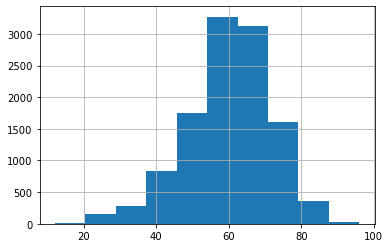

In [32]:
data['composure'].hist()

In [33]:
data['composure'] = data['composure'].fillna(data['composure'].median()) #replaced NaN with the median of the column (61.0)
data['composure'].median()

61.0

In [34]:
data['composure'].isna().sum()

0

In [35]:
data['sliding tackle'].isna().sum()

0

In [36]:
data['a/w'].isna().sum()
#data['a/w'].value_counts

18

In [37]:
data = data[data['a/w'].isna()==False]

In [38]:
data['a/w'].isna().sum()

0

In [39]:
data['d/w'].isna().sum()
#data['d/w'].value_counts

0

In [40]:
data.isna().sum()

id             0
name           0
age            0
nationality    0
club           0
              ..
cb             0
rcb            0
rb             0
gk             0
ova            0
Length: 100, dtype: int64

In [41]:
nan_sum = data.isnull().sum().sum() #check for NaN sum total is 0
display(nan_sum)

0

In [42]:
pd.set_option('display.max_rows',None)

In [43]:
data.dtypes

id                    int64
name                 object
age                   int64
nationality          object
club                 object
bp                   object
position             object
team & contract      object
height               object
weight               object
foot                 object
growth                int64
joined               object
value                object
wage                 object
release clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions             int64
balance             float64
power               

In [44]:
data['joined'].unique

<bound method Series.unique of 0         Jul 1, 2015
1        Jan 16, 2015
2        Jan 31, 2019
3         Jul 1, 2016
4         Jul 1, 2018
5        Jul 18, 2020
6         Sep 2, 2019
7         Aug 2, 2019
8        Aug 30, 2018
9        Jan 27, 2020
10       May 23, 2019
11        Jan 1, 2020
12       Aug 12, 2020
13       Jun 23, 2015
14       Jun 28, 2020
15        Jan 1, 2019
16        Oct 8, 2019
17        Jan 1, 2009
18        Jul 1, 2018
19        Jan 1, 2018
20        Jul 1, 2019
21        Mar 4, 2013
22       Jan 28, 2018
23       Jul 13, 2018
24       Jan 23, 2020
25        Jan 1, 2019
26        Jul 1, 2015
27        Jul 1, 2015
28        Jul 5, 2019
29       Feb 15, 2017
30       Aug 28, 2020
31        Jan 1, 2019
33       Jan 20, 2020
34       Aug 20, 2019
35       Jul 17, 2019
36        Jul 1, 2019
37        Jul 1, 2019
38       Aug 26, 2020
39       Jul 25, 2019
40        Jul 1, 2016
41       Sep 29, 2020
42        Jan 1, 2019
43        Aug 6, 2020
45       May 28, 2019
4

In [45]:
data['joined'] = pd.to_datetime(data['joined']) #changed joined from obj to datetime

In [46]:
pd.set_option('display.max_columns', None)
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,2015-07-01,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,2015-01-16,€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,2019-01-31,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,2016-07-01,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,2018-07-01,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [47]:
data['weight'] = data['weight'].str.replace("lbs","") #removed the lbs with ""
data['weight'].unique()

array(['161', '159', '134', '152', '150', '154', '192', '163', '172',
       '130', '170', '157', '165', '198', '168', '176', '181', '174',
       '123', '179', '196', '190', '194', '141', '137', '143', '139',
       '185', '183', '146', '187', '132', '148', '126', '207', '216',
       '201', '128', '205', '203', '212', '209', '227', '225', '121',
       '117', '220', '214', '236', '223', '218', '243', '229', '119'],
      dtype=object)

In [48]:
data['weight']= pd.to_numeric(data['weight']) #changed obj to integer

In [49]:
data['weight'].dtype

dtype('int64')

In [50]:
def cleanup_value(value_string):
    cleaned_value = value_string.replace("€","")
    cleaned_value = cleaned_value.replace("K","")
    cleaned_value = cleaned_value.replace("M","")
    cleaned_value = float(cleaned_value)
    if 'K' in value_string:
        cleaned_value = cleaned_value*1000
    if 'M' in value_string:
        cleaned_value = cleaned_value*1000000
    return cleaned_value


data['value'] = data['value'].map(cleanup_value)  
data['wage'] = data['wage'].map(cleanup_value)  
data['release clause'] = data['release clause'].map(cleanup_value)  

In [51]:
def cleanup_height(height_string):
    numbers = height_string.replace('"','')
    numbers = numbers.split("'")
    
    ft = int(numbers[0])
    inch = int(numbers[1])

    inch += ft * 12
    h_cm = round(inch * 2.54, 1)

    return h_cm


data['height'] = data['height'].map(cleanup_height)

In [52]:
data = data.rename(columns={"height": "height in cm"})

In [53]:
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height in cm,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.3,161,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.9,159,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.6,134,Right,0,2019-01-31,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.8,152,Right,13,2016-07-01,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.3,150,Right,8,2018-07-01,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [54]:
data['height in cm'].dtype

dtype('float64')

In [55]:
data['contract'].dtype

dtype('O')

In [56]:
data['contract'].value_counts()

2019 ~ 2021                                    922
2019 ~ 2022                                    753
2018 ~ 2021                                    722
2020 ~ 2022                                    699
2019 ~ 2023                                    624
2020 ~ 2021                                    613
2020 ~ 2023                                    564
2020 ~ 2024                                    416
2018 ~ 2022                                    413
2017 ~ 2021                                    392
Jun 30, 2021 On Loan                           368
2019 ~ 2024                                    351
2018 ~ 2023                                    309
2019 ~ 2020                                    297
2017 ~ 2022                                    272
2018 ~ 2020                                    248
2016 ~ 2021                                    222
Free                                           218
2020 ~ 2020                                    183
2017 ~ 2020                    

In [57]:
data = data[data['contract'] != 'Free']
data = data[data['contract'] != 'Ivory Coast Free']

In [58]:
def cleanup_contract(contract_string):
    if 'On Loan' in contract_string:
        return 0

    match = re.search(r'.*(\d\d\d\d ~ \d\d\d\d)', contract_string)
    if not match:
        print(contract_string)
    date_range = match.group(1)
    years_of_contract = date_range.split(" ~ ")
    
    start_year = int(years_of_contract[0])
    end_year = int(years_of_contract[1])
    
    total_years =  end_year - start_year

    return total_years

In [59]:
data['contract_years'] = data['contract'].map(cleanup_contract)

In [60]:
def remove_stars(column):
    updated_col = column.str.replace("★","") #removed the ★ with ""
    return pd.to_numeric(updated_col)


In [61]:
data['w/f'] = remove_stars(data['w/f'])
data['sm'] = remove_stars(data['sm'])
data['ir'] = remove_stars(data['ir'])

In [62]:
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height in cm,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,contract_years
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.3,161,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,5
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.9,159,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,0
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.6,134,Right,0,2019-01-31,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,3
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.8,152,Right,13,2016-07-01,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,5
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.3,150,Right,8,2018-07-01,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,3


In [63]:
data['hits'].unique()


array(['3', '44', '73', '7', '4', '6', '49', '87', '22', '9', '19', '430',
       '89', '5', '8', '239', '69', '32', '18', '24', '556', '20', '391',
       '25', '10', '42', '191', '249', '185', '27', '204', '47', '113',
       '335', '11', '28', '137', '13', '17', '108', '21', '30', '33',
       '66', '16', '15', '160', '412', '12', '3.3K', '26', '162', '1.1K',
       '29', '52', '14', '175', '663', '60', '350', '245', '80', '37',
       '56', '70', '270', '23', '61', '116', '67', '43', '111', '39',
       '352', '40', '48', '2.3K', '82', '50', '45', '120', '79', '223',
       '201', '86', '110', '36', '88', '34', '64', '418', '83', '321',
       '153', '97', '65', '278', '81', '442', '46', '571', '57', '177',
       '154', '38', '583', '259', '268', '303', '98', '632', '59', '455',
       '109', '91', '130', '124', '114', '1K', '242', '62', '362', '78',
       '565', '105', '95', '215', '520', '225', '55', '142', '122', '213',
       '51', '156', '227', '31', '58', '75', '102', '138'

In [64]:
data['hits'] = data['hits'].map(cleanup_value)

In [65]:
data.dtypes

id                           int64
name                        object
age                          int64
nationality                 object
club                        object
bp                          object
position                    object
team & contract             object
height in cm               float64
weight                       int64
foot                        object
growth                       int64
joined              datetime64[ns]
value                      float64
wage                       float64
release clause             float64
contract                    object
attacking                    int64
crossing                     int64
finishing                    int64
heading accuracy             int64
short passing                int64
volleys                    float64
skill                        int64
dribbling                    int64
curve                      float64
fk accuracy                  int64
long passing                 int64
ball control        

In [66]:
columns_with_plus = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

def sum_values(column):
    ls_new = []
    for i in column:
        iteration = {}
        part = i.rpartition('+')
        before_plus = part[0]
        after_plus = part[2]
        before_plus= pd.to_numeric(before_plus)
        after_plus= pd.to_numeric(after_plus)
        total = before_plus + after_plus
        ls_new.append(total)
    return ls_new

# data['ls'] = sum_values(data['ls'])
# data['st'] = sum_values(data['st'])
# data['rs'] = sum_values(data['rs'])
# data['lw'] = sum_values(data['lw'])

for column in columns_with_plus:
    data[column] = sum_values(data[column])

In [67]:
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height in cm,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,contract_years
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.3,161,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64,5
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.9,159,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77,0
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.6,134,Right,0,2019-01-31,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73.0,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80,3
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.8,152,Right,13,2016-07-01,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7.0,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59,5
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.3,150,Right,8,2018-07-01,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4.0,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65,3


<h1>Function for data cleaning</h1>

In [68]:
def dataset_cleaning(df):
    data_cleaned = df.copy()
    # Standardize header names
    cols = []
    for i in range(len(data_cleaned.columns)):
        cols.append(data_cleaned.columns[i].lower())
    data_cleaned.columns = cols

    # droping duplicates
    data_cleaned = data_cleaned.drop_duplicates()
    
    # #column'club'

    data_cleaned = data_cleaned[data_cleaned['club'].isna()==False] # drop all NaN values from club column

    #column'position'

    data_cleaned['position'] = data_cleaned['position'].fillna(most_popular_position)

    data_cleaned = data_cleaned[data_cleaned['joined'].isna()==False] # dropping these rows

    data_cleaned = data_cleaned.drop(['loan date end'], axis=1)

    data_cleaned['composure'] = data_cleaned['composure'].fillna(data_cleaned['composure'].median())

    data_cleaned = data_cleaned[data_cleaned['a/w'].isna()==False]

    data_cleaned['joined'] = pd.to_datetime(data_cleaned['joined'])

    data_cleaned['weight'] = data_cleaned['weight'].str.replace("lbs","")
    data_cleaned['weight']= pd.to_numeric(data_cleaned['weight'])

    data_cleaned['value'] = data_cleaned['value'].map(cleanup_value)  
    data_cleaned['wage'] = data_cleaned['wage'].map(cleanup_value)  
    data_cleaned['release clause'] = data_cleaned['release clause'].map(cleanup_value)  

    data_cleaned['height'] = data_cleaned['height'].map(cleanup_height)

    data_cleaned = data_cleaned.rename(columns={"height": "height in cm"})

    data_cleaned = data_cleaned[data_cleaned['contract'] != 'Free']
    data_cleaned = data_cleaned[data_cleaned['contract'] != 'Ivory Coast Free']

    data_cleaned['contract_years'] = data_cleaned['contract'].map(cleanup_contract)

    data_cleaned['w/f'] = remove_stars(data_cleaned['w/f'])
    data_cleaned['sm'] = remove_stars(data_cleaned['sm'])
    data_cleaned['ir'] = remove_stars(data_cleaned['ir'])

    data_cleaned['hits'] = data_cleaned['hits'].map(cleanup_value)
    
    columns_with_plus = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
    
    for column in columns_with_plus:
        data_cleaned[column] = sum_values(data_cleaned[column])
    
    return data_cleaned


In [69]:
data = pd.read_csv('fifa21_train.csv')
data = dataset_cleaning(data)

In [70]:
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height in cm,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,contract_years
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.3,161,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64,5
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.9,159,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77,0
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.6,134,Right,0,2019-01-31,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73.0,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80,3
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.8,152,Right,13,2016-07-01,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7.0,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59,5
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.3,150,Right,8,2018-07-01,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4.0,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65,3


<h1>Day 2 - Building linear model</h1>

In [71]:
data.head()

,id,name,age,nationality,club,bp,position,team & contract,height in cm,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,contract_years
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.3,161,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64,5
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.9,159,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77,0
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.6,134,Right,0,2019-01-31,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73.0,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80,3
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.8,152,Right,13,2016-07-01,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7.0,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59,5
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.3,150,Right,8,2018-07-01,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4.0,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65,3


In [72]:
#separating dataset 'data' to a set of the columns

columns_1_20 = []
columns_21_40 = []
columns_41_60 = []
columns_61_80 = []
columns_81_101 = []
counter = 0
for i in data.columns:
    if counter >=0 and counter<21:
        columns_1_20.append(i)
        counter = counter + 1
    
    elif counter >=21 and counter<40:
        columns_21_40.append(i)
        counter = counter + 1
    
    elif counter >=41 and counter<60:
        columns_41_60.append(i)
        counter = counter + 1
    
    elif counter >=61 and counter<80:
        columns_61_80.append(i)
        counter = counter + 1
    
    else:
        columns_81_101.append(i)
        counter = counter + 1

In [73]:
print(columns_1_20)

print(columns_21_40)
    
print(columns_41_60)

print(columns_61_80)

print(columns_81_101)

['id', 'name', 'age', 'nationality', 'club', 'bp', 'position', 'team & contract', 'height in cm', 'weight', 'foot', 'growth', 'joined', 'value', 'wage', 'release clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading accuracy']
['short passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk accuracy', 'long passing', 'ball control', 'movement', 'acceleration', 'sprint speed', 'agility', 'reactions', 'balance', 'power', 'shot power', 'jumping', 'stamina', 'strength']
['mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing tackle', 'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes', 'total stats', 'base stats']
['sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']
['long shots', 'w/f', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',

In [74]:
columns_1_20.insert(0,"ova")
columns_21_40.insert(0,"ova")
columns_41_60.insert(0,"ova")
columns_61_80.insert(0,"ova")
columns_81_101.remove("ova")
columns_81_101.insert(0,"ova")

In [75]:
data_part_1 = data[columns_1_20]
data_part_2 = data[columns_21_40]
data_part_3 = data[columns_41_60]
data_part_4 = data[columns_61_80]
data_part_5 = data[columns_81_101]

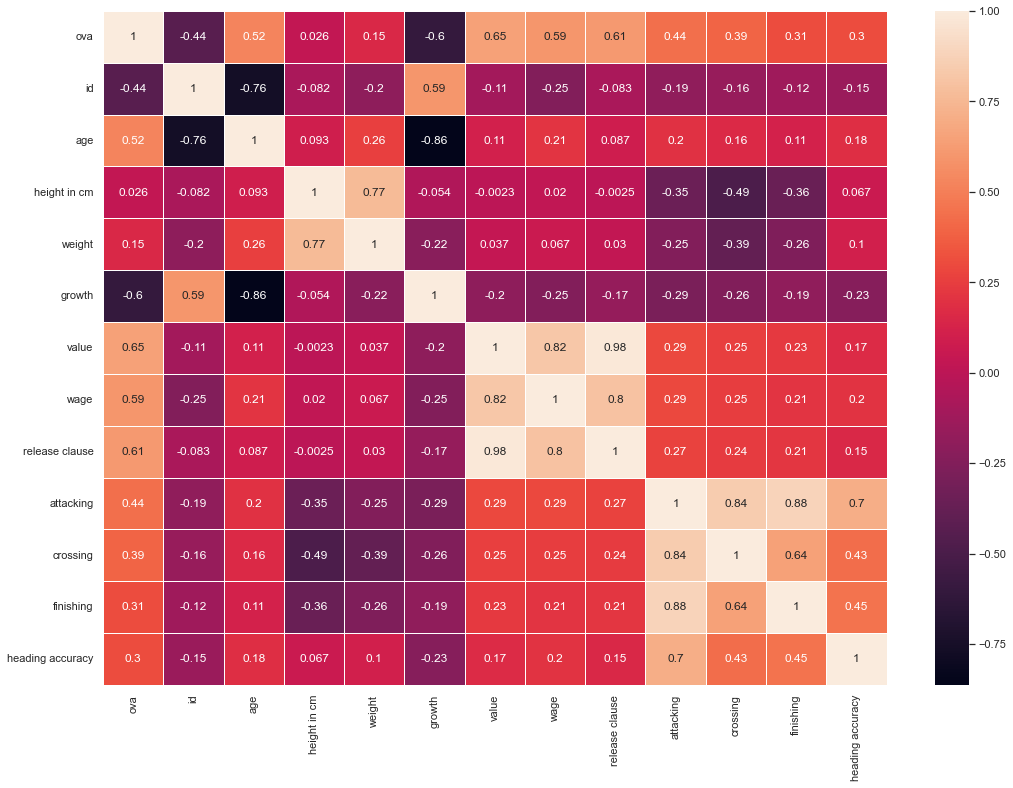

In [76]:
sns.set(rc={'figure.figsize':(17.55,12.4)})
correlations_matrix = data_part_1.corr()
sns.heatmap(correlations_matrix, annot=True, linewidths=1)
plt.show()

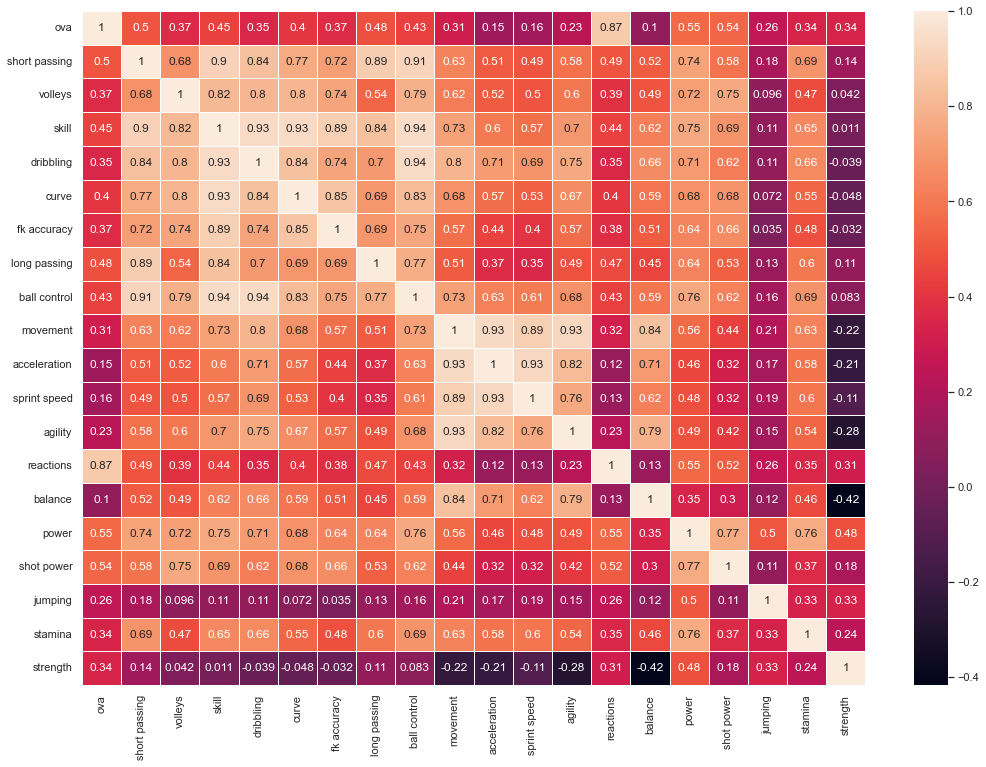

In [77]:
sns.set(rc={'figure.figsize':(17.55,12.4)})
correlations_matrix = data_part_2.corr()
sns.heatmap(correlations_matrix, annot=True, linewidths=1)
plt.show()

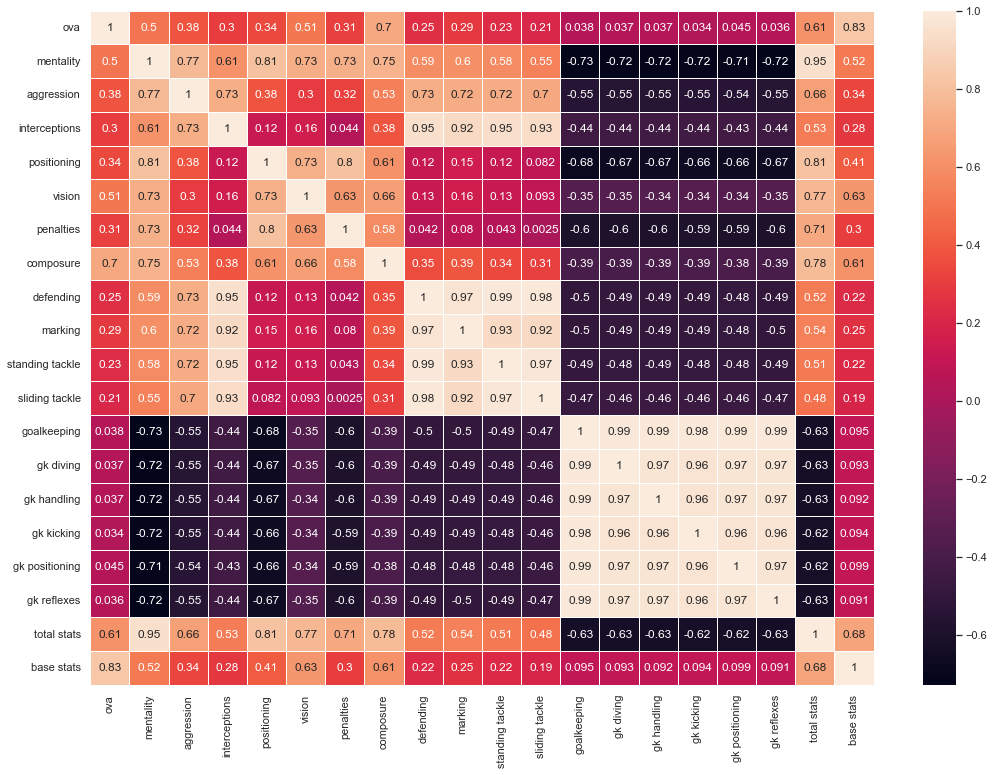

In [78]:
sns.set(rc={'figure.figsize':(17.55,12.4)})
correlations_matrix = data_part_3.corr()
sns.heatmap(correlations_matrix, annot=True, linewidths=1)
plt.show()

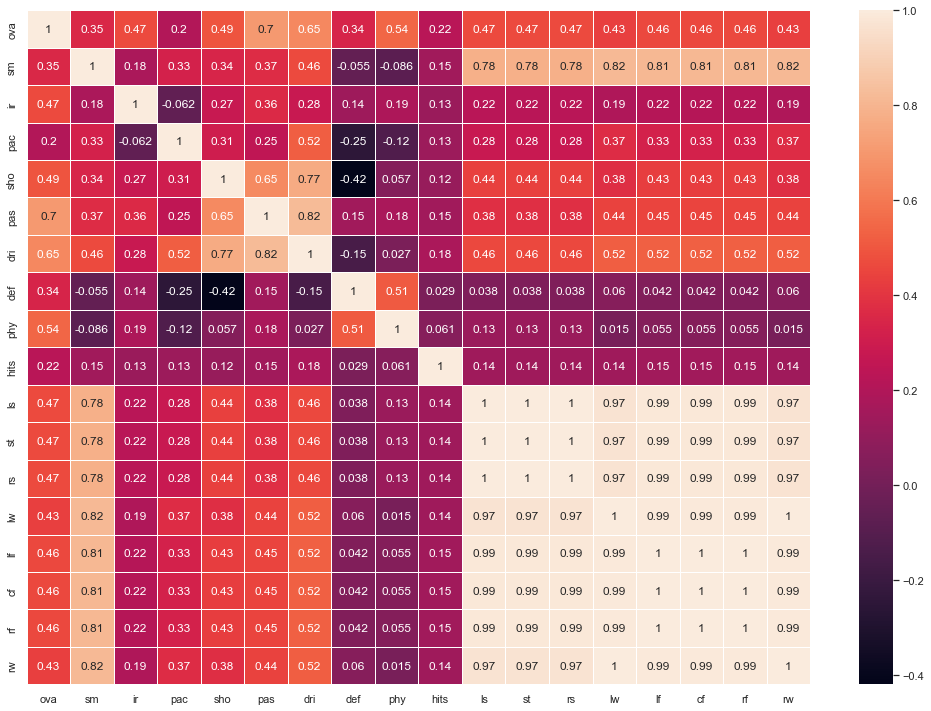

In [79]:
sns.set(rc={'figure.figsize':(17.55,12.4)})
correlations_matrix = data_part_4.corr()
sns.heatmap(correlations_matrix, annot=True, linewidths=1)
plt.show()

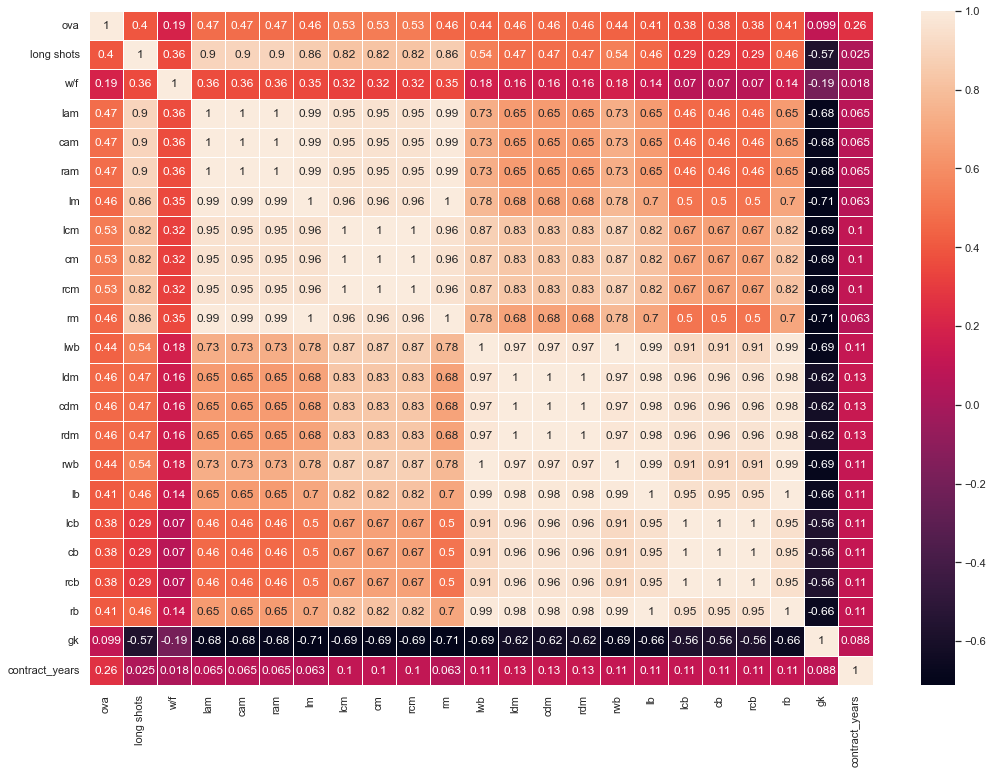

In [80]:
sns.set(rc={'figure.figsize':(17.55,12.4)})
correlations_matrix = data_part_5.corr()
sns.heatmap(correlations_matrix, annot=True, linewidths=1)
plt.show()

In [81]:
# relevant_columns = []
                    

In [82]:
# data_relevant = data[]
# data_relevant.head()

In [83]:
# data_relevant.shape

In [84]:
# # sorting players by overall rating
# players_sorted = data_relevant.sort_values(by='ova', ascending=False)
# players_sorted.head()

In [85]:
# # Plot the 10 best players 
# sns.set(rc={'figure.figsize':(17.55,12.4)})
# best_players = sns.barplot(x= players_sorted.name[:10], y=players_sorted.ova[:10], data=players_sorted)
# best_players.set(ylim=(75, 100))
# best_players.set_title('Top-10 players', fontsize=30)